# SBB Half Fair Plus Comparison

https://www.sbb.ch/de/billette-angebote/abos/halbtax-plus.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f0(x, cost, bonus):
    """Half Fair Plus Subscription Model"""
    steps = np.ceil(x / (cost + bonus))
    min_saved = (steps - 1) * bonus
    return np.fmax(min_saved, x - steps * cost)

def f1(x):
    """Half Fair Plus 1000"""
    return f0(x, 800, 200)
    
def f2(x):
    """Half Fair Plus 2000"""
    return f0(x, 1500, 500)

def f3(x):
    """Half Fair Plus 3000"""
    return f0(x, 2100, 900)

def bonus_turnovers(a, b, a_initial_cost):
    turnovers = np.argwhere(np.diff(np.sign(a - b))).flatten()
    return turnovers[(turnovers % 10 == 0) & (turnovers != a_initial_cost)]

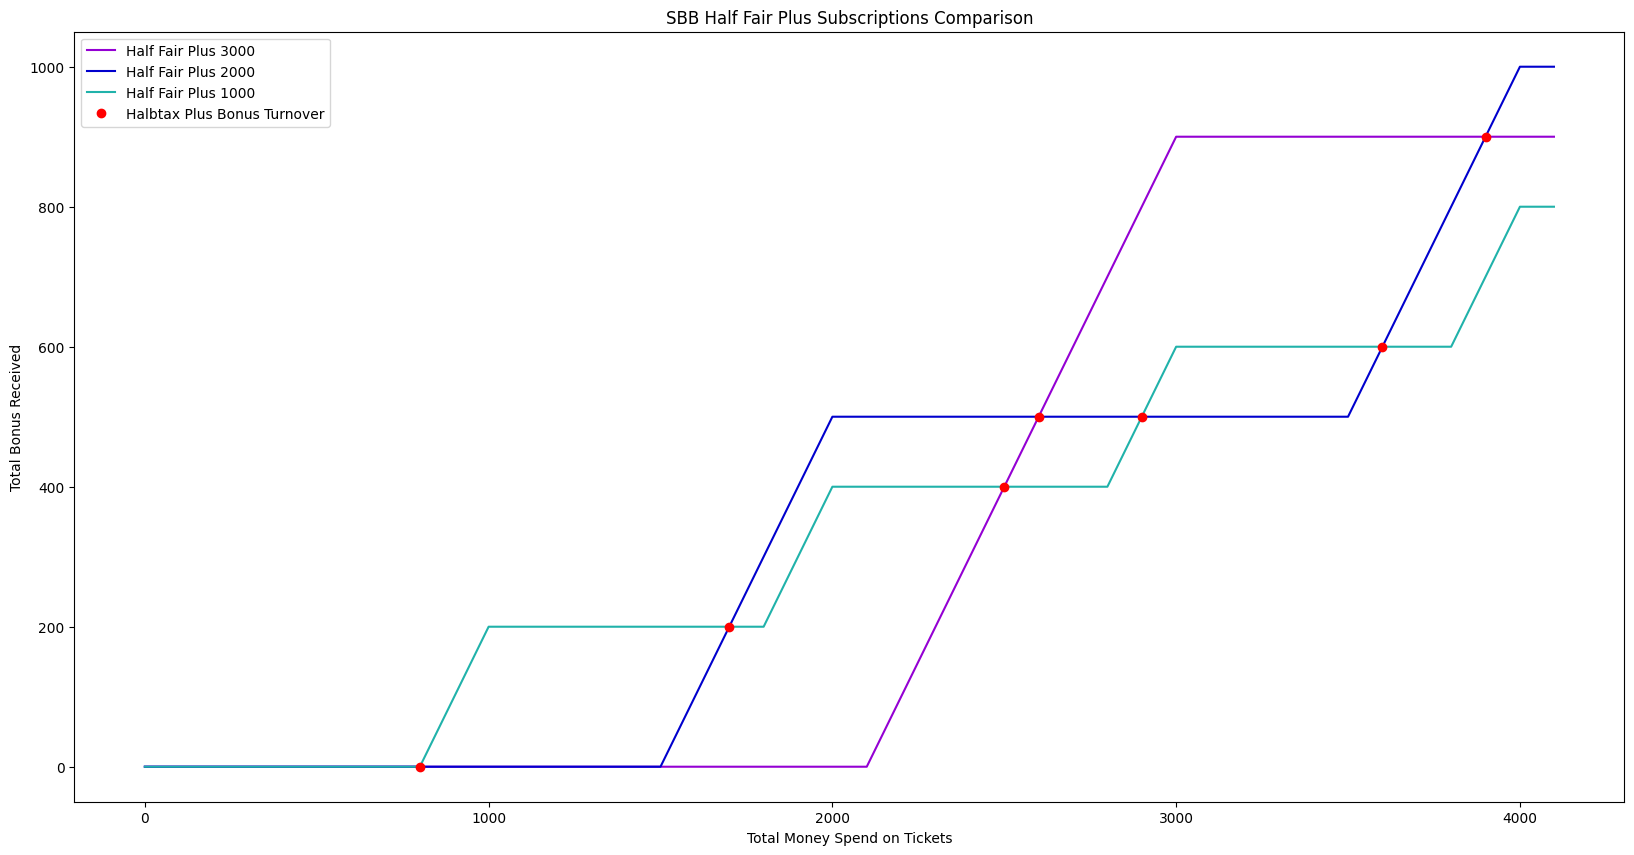

Halbtax Plus 1000 vs. 2000 Bonus Turnovers: [1700 2900 3600]
Halbtax Plus 2000 vs. 3000 Bonus Turnovers: [2600 3900]
Halbtax Plus 1000 vs. 3000 Bonus Turnovers: [ 800 2500]


In [16]:
x = np.arange(0, 4100, 1)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)

p12 = bonus_turnovers(y1, y2, 800)
p23 = bonus_turnovers(y2, y3, 1500)
p13 = bonus_turnovers(y1, y3, 3000)

plt.figure(figsize=(20, 10))
plt.plot(x, y3, color='darkviolet', label='Half Fair Plus 3000')
plt.plot(x, y2, color='mediumblue', label='Half Fair Plus 2000')
plt.plot(x, y1, color='lightseagreen', label='Half Fair Plus 1000')

plt.plot(x[p12], y1[p12], 'o', color='red', label='Halbtax Plus Bonus Turnover')
plt.plot(x[p13], y1[p13], 'o', color='red')
plt.plot(x[p23], y2[p23], 'o', color='red')
plt.ylabel('Total Bonus Received')
plt.xlabel('Total Money Spend on Tickets')
plt.title('SBB Half Fair Plus Subscriptions Comparison')
plt.legend()
plt.show()

print(f"Halbtax Plus 1000 vs. 2000 Bonus Turnovers: {x[p12]}")
print(f"Halbtax Plus 2000 vs. 3000 Bonus Turnovers: {x[p23]}")
print(f"Halbtax Plus 1000 vs. 3000 Bonus Turnovers: {x[p13]}")